# Dataset 과 DataLoader

- 딥러닝 모델을 학습시키고 평가할때 사용할 데이터를 제공하기 위한 객체
- **torch.utils.data.Dataset**
    - 원본 데이터셋(input/output dataset)을 저장하고 있으며 indexing을 통해 데이터를 하나씩 제공한다.
        - 제공시 data augmentation등 원본데이터를 변환해서 제공하도록 처리를 할 수 있다.
    - subscriptable, iterable 타입. 
    > subscriptable타입: indexing을 이용해 원소 조회가 가능한 타입)
    
- **torch.utils.data.DataLoader**
    - Dataset의 데이터를 batch단위로 모델에 제공하기 위한 객체.
    - 반복문을 통해 데이터에게 값을 제공한다.
        - iterable 타입
    - Dataset이 가지고 있는 데이터를 어떻게 제공할 지 설정한다.
        - batch size, shuffle 등을 모델에 데이터제공을 어떻게 할지 방식을 설정한다.

In [1]:
#간단하게 이야기해서, 데이터를 dataset이라고 하고, dataloader는 데이터를 제공하는 놈이다.
#dataloader는 데이터를 제공하는 놈이기 때문에 1놈밖에 없다.



#우선 dataset을 만든 다음, 이를 토대로 dataloader를 만든다.
#그 dataloader에게 batch 단위로 데이터를 요구하면 된다.



# Built-in Dataset

- 파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
- 모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    - [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    - [text dataset](https://pytorch.org/text/stable/datasets.html)
    - [audio dataset](https://pytorch.org/audio/stable/datasets.html)

In [2]:
#built in 은 한마디로 파이토치에서 제공한 dataset이라는 의미이다.
#크게 컴퓨터 비전, text, audio 등이 있다. 이걸 쓰게 될 때 잘 보도록 하자.

## Image  Built-in dataset Loading
torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

- 각 Dataset 클래스의 주요 매개변수
    - **root**: str
        - Raw data를 저장할 디렉토리 경로
    - **train**: bool
        - True일경우 Train set을 False일 경우 Test set을 load
    - **download**: bool
        - True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    - **transform**: function
        - Loading한 이미지를 변환하는 function.
            - Normalization이나 data Agumentation 처리를 한다.
            

In [2]:
#위의 dataset 중에서 image를 볼 것이다. 
#위의 매개변수들을 잘 보도록 하자. 근데 뭐 사실..... 직접 해 봐야 잘 알 수 있는 노릇이다. 



In [3]:
#import 구문

import torch
import torch.nn as nn
from torchvision import datasets  #torchvision(파이토치 영상처리 모듈).datasets(이미지 데이터셋 제공 클래스)
import numpy as np



In [4]:
#데이터들을 저장할 디렉토리를 정한다.
DATASET_ROOT_PATH = "datasets" #상대 경로, 절대 경로 상관 없음.



#MNIST dataset 생성
##train dataset

mnist_trainset = datasets.MNIST(root=DATASET_ROOT_PATH,#원본데이터파일들이 저장하는 위치.
                               train=True, #true: train set, false: test set
                               download=True #True: 원본파일이 없으면 다운로드를 받는다.
                               #transform = #이미지변환처리함수 #이미지를 제공하기 전에 전체 전처리할 함수
                               
                               )

###test dataset
### train을 false로만 바꿔주면 된다.

mnist_testset =  datasets.MNIST(root=DATASET_ROOT_PATH,
                               train=False, #true: train set, false: test set
                               download=True #True: 원본파일이 없으면 다운로드를 받는다.
                               #transform = #이미지변환처리함수 #이미지를 제공하기 전에 전체 전처리할 함수
                               
                               )




In [5]:
###타입 확인

print(type(mnist_trainset),type(mnist_testset))
print(isinstance(mnist_trainset,torch.utils.data.Dataset)) #dataset의 하위클래스의 객체(상속관계)인지 물어보는 것이다.
#isinstance는 상속관계인지 물어보는 코드이다.



<class 'torchvision.datasets.mnist.MNIST'> <class 'torchvision.datasets.mnist.MNIST'>
True


In [6]:
#built-in dataset 정보 확인

print(mnist_trainset)
print("="*20)
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: datasets
    Split: Test


In [7]:
##총데이터의 개수만 확인


print(len(mnist_trainset),len(mnist_testset))

60000 10000


In [8]:
#dataset은 subsriptable 타입(indexing이 가능한)이다.
#그래서 인덱싱으로 개별 데이터 조회가 가능하다.

data1 = mnist_trainset[0]
print(type(data1)) #tuple: (input,output)
print(type(data1[0]),type(data1[1]))
#어? 1번 인덱스가 뭘까? 0번은 또 뭘까? 아래에서 확인하자.

<class 'tuple'>
<class 'PIL.Image.Image'> <class 'int'>


In [9]:
print(data1[1])

data1[0]

5


(28, 28) 0 255


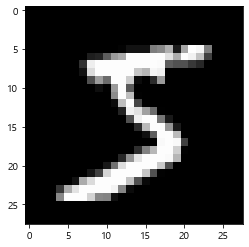

In [10]:
#data1의 image를 ndarray 반환
import matplotlib.pyplot as plt
img1 = np.array(data1[0])
print(img1.shape,img1.min(),img1.max())
plt.imshow(img1,cmap='gray')
plt.show()

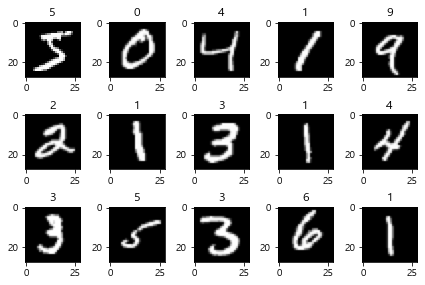

In [11]:
#이미지 여러개 확인

for i in range(15):
    plt.subplot(3,5,i+1)
    img, label = mnist_trainset[i] #튜플대입
    img = np.array(img)
    plt.imshow(img,cmap="gray")
    plt.title(str(label)) #문자열로 변환해야 타이플을 볼 수 있다.

plt.tight_layout()
plt.show()

In [12]:
#####output의 범주값을 확인 ->mnist는 분류문제를 위한 데이터. 분류 문제:y가 범주형

mnist_trainset.classes
#classes라는 메소드를 잘 보도록 하자.

#list :index-index,value: 정답의 의미 문자열.

#

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [13]:
mnist_trainset.class_to_idx
#정답의미 -> class :딕셔너리.
#class_to_idx라는 매서드도 잘 보도록 하자.


{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [14]:
pred_label = 3 #모델이 추정한 값으로 가정한다.

mnist_trainset.classes[pred_label]

'3 - three'

In [15]:
mnist_trainset.class_to_idx['3 - three'] #3 - three를 모델이 어떤 값으로 추정하는지

3

### TODO

- CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train, test dataset의 데이터 개수
    1. class index - class name
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.
    
    

In [16]:
import torch
import torch.nn as nn
from torchvision import datasets


import numpy as np


In [17]:
cifar10_trainset = datasets.CIFAR10(root=DATASET_ROOT_PATH,train=True,download=True)
cifar10_testset = datasets.CIFAR10(root=DATASET_ROOT_PATH,train=False,download=True)


Files already downloaded and verified
Files already downloaded and verified


In [18]:
#데이터 개수 등 정보확인

print(cifar10_trainset)
print("--------------")
print(cifar10_testset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: datasets
    Split: Train
--------------
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: datasets
    Split: Test


In [19]:
#데이터 개수

print("데이터개수")
print(len(cifar10_trainset),len(cifar10_testset))

데이터개수
50000 10000


In [20]:
#class를 class name으로 변환시키는것
#class는 '정답'이고 class name은 '정답의 의미'이다.

cifar10_trainset.classes #class의 이름을 파악할 수 있다.



['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [21]:
cifar10_trainset.class_to_idx #index를 잘 보여준다.

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [22]:
#데이터를 조회
## 1개

img,label = cifar10_trainset[0]
print(type(img))
print(label,type(label))

#print을 통해 여러가지 정보를 파악할 수 있다.

<class 'PIL.Image.Image'>
6 <class 'int'>


In [23]:
#6이라는 정보를 얻었으니, 이제 6이 뭘 의미하는지 알아야 한다.


cifar10_trainset.classes[6]

'frog'

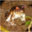

In [24]:
img #나오는 이미지를 잘 확인하자.

In [25]:
#img(PIL.Image) ->ndarray
#넘파이로 데이터를 변환시키는 것이다.
img_arr = np.array(img)
print(img_arr.shape)
print(img_arr.dtype)

(32, 32, 3)
uint8


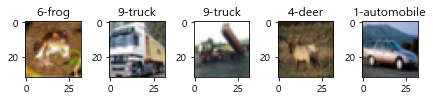

In [26]:
#자, 이제 차근차근 이미지를 그려보자.
for i in range(5):
    plt.subplot(1,5,i+1)
    x,y = cifar10_trainset[i]
    img = np.array(x)
    plt.imshow(img)
    #f문자열을 쓰는 것을 잘 보도록 하자.
    plt.title(f"{y}-{cifar10_trainset.classes[y]}")
    
    
plt.tight_layout()
plt.show()

#가장 위의 range의 숫자나 subplot의 숫자를 조절함으로서 
#출력되는 이미지의 수를 조절할 수 있다.

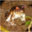

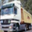

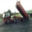

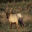

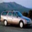

In [27]:
##PIL Image를 출력한다.
#근데 약간은 다른 방법이 필요하다.
#display를 이용해서 출력한다. 이는 IPython에 있다.


from IPython.display import display
for i in range(5):
    display(cifar10_trainset[i][0])

### transform 매개변수를 이용한 데이터전처리
- Dataset 생성할 때 전달하는 함수로 원본데이터를 모델에 주입(feeding)하기 전 **전처리 과정을 정의한다.**
    - Data Pipeline을 구성하는 함수
- 매개변수로 input data 한개를 입력받아 처리한 결과를 반환하도록 구현한다.

In [29]:
###위에서 읽은 MNIST 이미지 정보를 불러오자.

data = mnist_trainset[0][0]

img = np.array(data)
print("data의 type:",type(data))
print(img.shape)
print("pixcel 최소,최대값 - ",img.min(),img.max())
print("dtype:",img.dtype)





data의 type: <class 'PIL.Image.Image'>
(28, 28)
pixcel 최소,최대값 -  0 255
dtype: uint8


### torchvision.transforms.ToTensor
 -  PIL Image나 NumPy ndarray 를 FloatTensor(float32) 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 \[0., 1.\] 범위로 비례하여 조정한다.
 - Image 의 shape을 (channel, height, width) 로 변경한다.
 - https://pytorch.org/vision/stable/transforms.html

In [28]:
from torchvision import transforms


#위에서 한 것에서 transform을 붙인 것이다.
mnist_trainset2 = datasets.MNIST(root=DATASET_ROOT_PATH,train=True,download=True,transform=transforms.ToTensor()
                                 
                                )


#transform이 설정 안된 경우: 원본이미지 파일---- 읽어서 --- dataset->반환
#설정된 경우: 원본이미지 파일 -------읽음------dataset------transform 함수에 이미지를 넣음 ------- 반환
#그냥 중간 과정이 약간 달라졌다고 생각하면 된다.

In [29]:
#실제로 그런지 한번 보자.

data2,label = mnist_trainset2[0]
print(label)



5


In [30]:
print("data2의 타입:",type(data2))
#데이터 타입을 보면, tensor로 바뀌었다는 것을 볼 수 있다.  tensor가 바꿔주는 역활(처리)을 한다고 볼 수 있다.
print(data2.shape)
print("pixcel의 최소,최대:",data2.min(),data2.max())
print("pixcel의 타입:",data2.type)

data2의 타입: <class 'torch.Tensor'>
torch.Size([1, 28, 28])
pixcel의 최소,최대: tensor(0.) tensor(1.)
pixcel의 타입: <built-in method type of Tensor object at 0x000001A122B65E00>


### transform.Normalize
- 채널별로 지정한 평균을 뺀 뒤 지정한 표준편차로 나누어서 정규화를 진행한다.
- ToTensor()로 변환된 데이터를 받아서 추가 변환
        - 여려 변환을 할 경우 `torchvision.transforms.Compose` 클래스를 이용한다.

In [31]:
#여러개의 transform 함수들을 묶어서 순서대로 호출 -> compose를 이용해서 묶어준다.

### 리스트에 호출순서대로 넣어서 전달한다.


#ToTensor() -> Normalize()의 순서가 중요하다.


transform = transforms.Compose([transforms.ToTensor(), #첫번째 변환작업결과를 받아서 두번째 변환
                               transforms.Normalize(mean=0.5,std=0.5)])



mnist_trainset3 = datasets.MNIST(root=DATASET_ROOT_PATH,train=True,download=True,transform=transform)


mnist_testset3 = datasets.MNIST(root=DATASET_ROOT_PATH,train=False,download=True,transform=transform)
#앞에서도 보았듯이, 가장 중요한 차이는 train의 여부이다.






In [32]:
img3,label3 = mnist_trainset3[0]
print(type(img3))
print(img3.shape)
print(img3.dtype)


print(img3.min(),img3.max())

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
torch.float32
tensor(-1.) tensor(1.)


In [33]:
#모든 채널에 공통적으로 사용할 평균/표준편차를 설정하자.
#mean,std를 값으로 설정할 수 있고 튜플로 설정할 수 있다.
#normalizer = transforms.Normalize(mean=0.5,std=0.5)
normalizer = transforms.Normalize(mean=(0.485,0.456,0.406),std=(0.229,0.224,0.225))
transform2 = transforms.Compose([transforms.ToTensor(), #변수명만 바꾼다잉.
                              normalizer])



cifa10_trainset2 = datasets.CIFAR10(root=DATASET_ROOT_PATH,train=True,download=True,transform=transform2)




Files already downloaded and verified


In [34]:
#각 색에 관한 정보를 파악하도록 하자.

img4, label4 = cifa10_trainset2[0]
print(img4.shape)
print("Red channel의 min/max:",img4[0].min(),img4[0].max())
print("Green channel의 min/max:",img4[1].min(),img4[1].max())
print("Blue channel의 min/max:",img4[2].min(),img4[2].max())

torch.Size([3, 32, 32])
Red channel의 min/max: tensor(-2.1179) tensor(2.2489)
Green channel의 min/max: tensor(-2.0357) tensor(2.3936)
Blue channel의 min/max: tensor(-1.8044) tensor(2.2914)


## DataLoader 생성

- DataLoader
    - 모델이 학습하거나 추론할 때 Dataset의 데이터를 모델에 제공해준다. (feeding)
    - initalizer속성
        - dataset: 값을 제공하는 Dataset 타입 객체
        - batch_size: 한번에 값을 제공할 batch 크기
        - shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        - drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 모델에 제공하지 않는다.


In [35]:
from torch.utils.data import DataLoader



#mnist_xxx_3 (transform=ToTensor+Normalize)

mnist_train_loader = DataLoader(dataset=mnist_trainset3, #데이터를 제공받을 놈을 정한다.
                                batch_size=200, #한번에 제공할 데이터 개수
                                shuffle=True, #처음 제공 전에 데이터들을 섞을지의 여부
                                #디폴트는 false이다.
                                drop_last = True,#제공할 데이터개수가 batch_size보다 적을 경우 제공할지의 여부(이것도 default는 false)
                                
                               )


mnist_test_loader = DataLoader(dataset=mnist_testset3,batch_size=200)



In [36]:
## dataloader = iterator 타입
### 에폭당 step수 조회-------drop_last가 true인가 false인가에 따라서 판가름이 난다.

print(len(mnist_train_loader),len(mnist_test_loader))



300 50


In [37]:
##dataloader에 설정된 dataset을 조회한다.
#여러가지 추가적인 정보들을 조회한다.
mnist_train_loader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [38]:
mnist_test_loader.batch_size #batch_size도 알 수 있다.

200

In [39]:
#dataloader에서 데이터를 조회 ========== next와 iter를 통해 적절하게 데이터를 조달했음을 숙지하라.

batch1 = next(iter(mnist_train_loader))

In [40]:
print(type(batch1),len(batch1)) #batch1은 2가지 값을 가진다.


X,y = batch1
print(type(X),type(y))

<class 'list'> 2
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [41]:
print(X.shape) #[200:batch size,1:channel, 28:height, 28:width]
print(y.shape) #200:batch_size

torch.Size([200, 1, 28, 28])
torch.Size([200])


## Custom Dataset 구현

1. `torch.utils.data.Dataset` 클래스를 상속한 클래스를 정의한다.
2. `__init__(self, ...)` 
    - DataSet객체 생성시 필요한 설정들을 초기화 한다. 
    - ex) Data저장 경로, transform 설정 여부 등
3. `__len__(self)`
    - 총 데이터 수를 반환하도록 구현한다.
    - DataLoader가 Batch 생성할 때 사용한다.
4. `__getitem__(self, index)`
    - index의 Data point를 반환한다.
    - input(X), output(y) 를 튜플로 반환한다.
    - transform이 있을 경우 변환처리한 input을 반환한다.

In [57]:
#subscriptable 타입 클래스 구현 ->indexing 기능 객체

class Mysub():
    
    
    def __init__(self):
        #제공할 값들을 초기화한다.
        self.one = "사자"
        self.two = "호랑이"
        self.three = "하마"
        
        
    def __len__(self):
        #제공할 데이터의 개수를 반환.
        return 3
    
    
    #인덱스를 반환하는 함수이다.
    def __getitem__(self,idx):    
        # idx의 값을 반환
        if idx==0:
            return self.one
        elif idx==1:
            return self.two
        elif idx==2:
            return self.three
        else:
            raise IndexError(f"{idx}번째 값이 없습니다.")
    

In [58]:
m = Mysub()
len(m)

3

In [59]:
m[1] #5번째 부터는 '5번째 값이 없습니다.'이런 식으로 정의가 된다.

'호랑이'

# OxfordPet Dataset 생성
- https://www.robots.ox.ac.uk/~vgg/data/pets/
- 개,고양이 37가지 품종
- 품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)

- 목표
    - train: 70%, validation: 20%, test: 10%

In [29]:
import os #운영체제에서 실행되는 여러가지 기능을 파이썬에서 실행 가능하게 해준다.
import re
from glob import glob
import tarfile
from PIL import Image
#각각이 어떤 것인지도 잘 파악하는 것이 중요.
#tarfile은 tar유형의 파일을 다루는 것이다.



import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms



DATA_ROOT_PATH = 'datasets' #경로
tarfile_path = os.path.join(DATA_ROOT_PATH,'images.tar.gz')
PET_DATA_PATH = os.path.join(DATA_ROOT_PATH,'oxfordpet')
PET_IMAGE_PATH = os.path.join(PET_DATA_PATH,"images") #압축 푼 이미지들 디렉토리 경로


os.makedirs(PET_DATA_PATH,exist_ok=True)

In [44]:
#압축 풀기: zip:zipfile 모듈, tar:tarfile 모듈
#이 구문은 복습 시 서칭이 약간 필요할 듯 하다.
with tarfile.open(tarfile_path,"r:gz") as tar: #with as 구문은 항상 쓰인다. 참고바람.
    tar.extractall(PET_DATA_PATH) #압축을 풀 디렉토리 경로를 지정해서 압축을 푼다.
    
    

In [45]:
##참고

#모든 이미지파일의 경로를 조회하기 위해서는 glob이라는 코드를 거시기하는 것이 좋다.

##*와 **의 차이를 잘 파악해두자. 파이썬 기초 강의에서 설명을 했었다.
file_list = glob(r"datasets\oxfordpet\**\*.jpg")

file_list

['datasets\\oxfordpet\\images\\Abyssinian_1.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_10.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_100.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_101.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_102.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_103.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_104.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_105.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_106.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_107.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_108.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_109.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_11.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_110.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_111.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_112.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_113.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_114.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_115.jpg',
 'datasets\\oxfo

In [46]:
##참조 코드


f= file_list[0]
print(f)
print("파일경로에서 파일명과 확장자를 분리:",os.path.splitext(f)) #확장자와 나머지 경로를 분리
print("파일경로에서 파일명(확장자포함)을 분리:",os.path.basename(f))
print("파일경로에서 디렉토리만 분리:",os.path.dirname(f))

datasets\oxfordpet\images\Abyssinian_1.jpg
파일경로에서 파일명과 확장자를 분리: ('datasets\\oxfordpet\\images\\Abyssinian_1', '.jpg')
파일경로에서 파일명(확장자포함)을 분리: Abyssinian_1.jpg
파일경로에서 디렉토리만 분리: datasets\oxfordpet\images


In [47]:
#이미지들 중 rgb 모드의 이미지만 남기고 삭제

remove_cnt = 0 #몇장을 삭제했는지 저장.

for idx,image_path in enumerate(file_list):
    print(idx,image_path)
#이미지 읽기: PIL.Image.open()
    with Image.open(image_path) as img:
        image_mode = img.mode 
    #RGB가 아니면 삭제
    if image_mode != "RGB":
        os.remove(image_path)
        remove_cnt+=1
        print(f"{idx+1}번째 파일 삭제. 파일명:{os.path.basename(image_path)}, mode:{image_mode}")
        #파일을 삭제하는 것을 볼 수 있다.

0 datasets\oxfordpet\images\Abyssinian_1.jpg
1 datasets\oxfordpet\images\Abyssinian_10.jpg
2 datasets\oxfordpet\images\Abyssinian_100.jpg
3 datasets\oxfordpet\images\Abyssinian_101.jpg
4 datasets\oxfordpet\images\Abyssinian_102.jpg
5 datasets\oxfordpet\images\Abyssinian_103.jpg
6 datasets\oxfordpet\images\Abyssinian_104.jpg
7 datasets\oxfordpet\images\Abyssinian_105.jpg
8 datasets\oxfordpet\images\Abyssinian_106.jpg
9 datasets\oxfordpet\images\Abyssinian_107.jpg
10 datasets\oxfordpet\images\Abyssinian_108.jpg
11 datasets\oxfordpet\images\Abyssinian_109.jpg
12 datasets\oxfordpet\images\Abyssinian_11.jpg
13 datasets\oxfordpet\images\Abyssinian_110.jpg
14 datasets\oxfordpet\images\Abyssinian_111.jpg
15 datasets\oxfordpet\images\Abyssinian_112.jpg
16 datasets\oxfordpet\images\Abyssinian_113.jpg
17 datasets\oxfordpet\images\Abyssinian_114.jpg
18 datasets\oxfordpet\images\Abyssinian_115.jpg
19 datasets\oxfordpet\images\Abyssinian_116.jpg
20 datasets\oxfordpet\images\Abyssinian_117.jpg
21 dat

194 datasets\oxfordpet\images\Abyssinian_94.jpg
195 datasets\oxfordpet\images\Abyssinian_95.jpg
196 datasets\oxfordpet\images\Abyssinian_96.jpg
197 datasets\oxfordpet\images\Abyssinian_97.jpg
198 datasets\oxfordpet\images\Abyssinian_98.jpg
199 datasets\oxfordpet\images\Abyssinian_99.jpg
200 datasets\oxfordpet\images\american_bulldog_10.jpg
201 datasets\oxfordpet\images\american_bulldog_100.jpg
202 datasets\oxfordpet\images\american_bulldog_101.jpg
203 datasets\oxfordpet\images\american_bulldog_102.jpg
204 datasets\oxfordpet\images\american_bulldog_103.jpg
205 datasets\oxfordpet\images\american_bulldog_104.jpg
206 datasets\oxfordpet\images\american_bulldog_105.jpg
207 datasets\oxfordpet\images\american_bulldog_106.jpg
208 datasets\oxfordpet\images\american_bulldog_107.jpg
209 datasets\oxfordpet\images\american_bulldog_108.jpg
210 datasets\oxfordpet\images\american_bulldog_109.jpg
211 datasets\oxfordpet\images\american_bulldog_11.jpg
212 datasets\oxfordpet\images\american_bulldog_110.jpg

396 datasets\oxfordpet\images\american_bulldog_96.jpg
397 datasets\oxfordpet\images\american_bulldog_97.jpg
398 datasets\oxfordpet\images\american_bulldog_98.jpg
399 datasets\oxfordpet\images\american_bulldog_99.jpg
400 datasets\oxfordpet\images\american_pit_bull_terrier_1.jpg
401 datasets\oxfordpet\images\american_pit_bull_terrier_10.jpg
402 datasets\oxfordpet\images\american_pit_bull_terrier_100.jpg
403 datasets\oxfordpet\images\american_pit_bull_terrier_101.jpg
404 datasets\oxfordpet\images\american_pit_bull_terrier_102.jpg
405 datasets\oxfordpet\images\american_pit_bull_terrier_103.jpg
406 datasets\oxfordpet\images\american_pit_bull_terrier_104.jpg
407 datasets\oxfordpet\images\american_pit_bull_terrier_105.jpg
408 datasets\oxfordpet\images\american_pit_bull_terrier_106.jpg
409 datasets\oxfordpet\images\american_pit_bull_terrier_107.jpg
410 datasets\oxfordpet\images\american_pit_bull_terrier_108.jpg
411 datasets\oxfordpet\images\american_pit_bull_terrier_109.jpg
412 datasets\oxford

603 datasets\oxfordpet\images\basset_hound_101.jpg
604 datasets\oxfordpet\images\basset_hound_102.jpg
605 datasets\oxfordpet\images\basset_hound_103.jpg
606 datasets\oxfordpet\images\basset_hound_104.jpg
607 datasets\oxfordpet\images\basset_hound_105.jpg
608 datasets\oxfordpet\images\basset_hound_106.jpg
609 datasets\oxfordpet\images\basset_hound_107.jpg
610 datasets\oxfordpet\images\basset_hound_108.jpg
611 datasets\oxfordpet\images\basset_hound_109.jpg
612 datasets\oxfordpet\images\basset_hound_11.jpg
613 datasets\oxfordpet\images\basset_hound_110.jpg
614 datasets\oxfordpet\images\basset_hound_111.jpg
615 datasets\oxfordpet\images\basset_hound_112.jpg
616 datasets\oxfordpet\images\basset_hound_113.jpg
617 datasets\oxfordpet\images\basset_hound_114.jpg
618 datasets\oxfordpet\images\basset_hound_115.jpg
619 datasets\oxfordpet\images\basset_hound_116.jpg
620 datasets\oxfordpet\images\basset_hound_117.jpg
621 datasets\oxfordpet\images\basset_hound_118.jpg
622 datasets\oxfordpet\images\ba

820 datasets\oxfordpet\images\beagle_119.jpg
821 datasets\oxfordpet\images\beagle_12.jpg
822 datasets\oxfordpet\images\beagle_120.jpg
823 datasets\oxfordpet\images\beagle_121.jpg
824 datasets\oxfordpet\images\beagle_122.jpg
825 datasets\oxfordpet\images\beagle_123.jpg
826 datasets\oxfordpet\images\beagle_124.jpg
827 datasets\oxfordpet\images\beagle_125.jpg
828 datasets\oxfordpet\images\beagle_126.jpg
829 datasets\oxfordpet\images\beagle_127.jpg
830 datasets\oxfordpet\images\beagle_128.jpg
831 datasets\oxfordpet\images\beagle_129.jpg
832 datasets\oxfordpet\images\beagle_13.jpg
833 datasets\oxfordpet\images\beagle_130.jpg
834 datasets\oxfordpet\images\beagle_131.jpg
835 datasets\oxfordpet\images\beagle_133.jpg
836 datasets\oxfordpet\images\beagle_134.jpg
837 datasets\oxfordpet\images\beagle_135.jpg
838 datasets\oxfordpet\images\beagle_136.jpg
839 datasets\oxfordpet\images\beagle_137.jpg
840 datasets\oxfordpet\images\beagle_138.jpg
841 datasets\oxfordpet\images\beagle_139.jpg
842 datasets

1042 datasets\oxfordpet\images\Bengal_137.jpg
1043 datasets\oxfordpet\images\Bengal_138.jpg
1044 datasets\oxfordpet\images\Bengal_139.jpg
1045 datasets\oxfordpet\images\Bengal_14.jpg
1046 datasets\oxfordpet\images\Bengal_140.jpg
1047 datasets\oxfordpet\images\Bengal_141.jpg
1048 datasets\oxfordpet\images\Bengal_142.jpg
1049 datasets\oxfordpet\images\Bengal_143.jpg
1050 datasets\oxfordpet\images\Bengal_144.jpg
1051 datasets\oxfordpet\images\Bengal_145.jpg
1052 datasets\oxfordpet\images\Bengal_146.jpg
1053 datasets\oxfordpet\images\Bengal_147.jpg
1054 datasets\oxfordpet\images\Bengal_148.jpg
1055 datasets\oxfordpet\images\Bengal_149.jpg
1056 datasets\oxfordpet\images\Bengal_15.jpg
1057 datasets\oxfordpet\images\Bengal_150.jpg
1058 datasets\oxfordpet\images\Bengal_151.jpg
1059 datasets\oxfordpet\images\Bengal_152.jpg
1060 datasets\oxfordpet\images\Bengal_153.jpg
1061 datasets\oxfordpet\images\Bengal_154.jpg
1062 datasets\oxfordpet\images\Bengal_155.jpg
1063 datasets\oxfordpet\images\Benga

1269 datasets\oxfordpet\images\Birman_161.jpg
1270 datasets\oxfordpet\images\Birman_162.jpg
1271 datasets\oxfordpet\images\Birman_163.jpg
1272 datasets\oxfordpet\images\Birman_164.jpg
1273 datasets\oxfordpet\images\Birman_165.jpg
1274 datasets\oxfordpet\images\Birman_166.jpg
1275 datasets\oxfordpet\images\Birman_167.jpg
1276 datasets\oxfordpet\images\Birman_168.jpg
1277 datasets\oxfordpet\images\Birman_169.jpg
1278 datasets\oxfordpet\images\Birman_17.jpg
1279 datasets\oxfordpet\images\Birman_170.jpg
1280 datasets\oxfordpet\images\Birman_171.jpg
1281 datasets\oxfordpet\images\Birman_172.jpg
1282 datasets\oxfordpet\images\Birman_173.jpg
1283 datasets\oxfordpet\images\Birman_174.jpg
1284 datasets\oxfordpet\images\Birman_175.jpg
1285 datasets\oxfordpet\images\Birman_176.jpg
1286 datasets\oxfordpet\images\Birman_177.jpg
1287 datasets\oxfordpet\images\Birman_178.jpg
1288 datasets\oxfordpet\images\Birman_179.jpg
1289 datasets\oxfordpet\images\Birman_18.jpg
1290 datasets\oxfordpet\images\Birma

1489 datasets\oxfordpet\images\Bombay_185.jpg
1490 datasets\oxfordpet\images\Bombay_186.jpg
1491 datasets\oxfordpet\images\Bombay_188.jpg
1492 datasets\oxfordpet\images\Bombay_189.jpg
1493 datasets\oxfordpet\images\Bombay_19.jpg
1494 datasets\oxfordpet\images\Bombay_190.jpg
1495 datasets\oxfordpet\images\Bombay_191.jpg
1496 datasets\oxfordpet\images\Bombay_192.jpg
1497 datasets\oxfordpet\images\Bombay_193.jpg
1498 datasets\oxfordpet\images\Bombay_194.jpg
1499 datasets\oxfordpet\images\Bombay_198.jpg
1500 datasets\oxfordpet\images\Bombay_2.jpg
1501 datasets\oxfordpet\images\Bombay_20.jpg
1502 datasets\oxfordpet\images\Bombay_200.jpg
1503 datasets\oxfordpet\images\Bombay_201.jpg
1504 datasets\oxfordpet\images\Bombay_202.jpg
1505 datasets\oxfordpet\images\Bombay_203.jpg
1506 datasets\oxfordpet\images\Bombay_204.jpg
1507 datasets\oxfordpet\images\Bombay_205.jpg
1508 datasets\oxfordpet\images\Bombay_206.jpg
1509 datasets\oxfordpet\images\Bombay_208.jpg
1510 datasets\oxfordpet\images\Bombay_

1698 datasets\oxfordpet\images\boxer_188.jpg
1699 datasets\oxfordpet\images\boxer_189.jpg
1700 datasets\oxfordpet\images\boxer_19.jpg
1701 datasets\oxfordpet\images\boxer_190.jpg
1702 datasets\oxfordpet\images\boxer_191.jpg
1703 datasets\oxfordpet\images\boxer_192.jpg
1704 datasets\oxfordpet\images\boxer_193.jpg
1705 datasets\oxfordpet\images\boxer_194.jpg
1706 datasets\oxfordpet\images\boxer_195.jpg
1707 datasets\oxfordpet\images\boxer_196.jpg
1708 datasets\oxfordpet\images\boxer_197.jpg
1709 datasets\oxfordpet\images\boxer_198.jpg
1710 datasets\oxfordpet\images\boxer_199.jpg
1711 datasets\oxfordpet\images\boxer_2.jpg
1712 datasets\oxfordpet\images\boxer_20.jpg
1713 datasets\oxfordpet\images\boxer_200.jpg
1714 datasets\oxfordpet\images\boxer_21.jpg
1715 datasets\oxfordpet\images\boxer_22.jpg
1716 datasets\oxfordpet\images\boxer_23.jpg
1717 datasets\oxfordpet\images\boxer_24.jpg
1718 datasets\oxfordpet\images\boxer_25.jpg
1719 datasets\oxfordpet\images\boxer_26.jpg
1720 datasets\oxford

1909 datasets\oxfordpet\images\British_Shorthair_241.jpg
1910 datasets\oxfordpet\images\British_Shorthair_248.jpg
1911 datasets\oxfordpet\images\British_Shorthair_25.jpg
1912 datasets\oxfordpet\images\British_Shorthair_258.jpg
1913 datasets\oxfordpet\images\British_Shorthair_26.jpg
1914 datasets\oxfordpet\images\British_Shorthair_263.jpg
1915 datasets\oxfordpet\images\British_Shorthair_265.jpg
1916 datasets\oxfordpet\images\British_Shorthair_266.jpg
1917 datasets\oxfordpet\images\British_Shorthair_267.jpg
1918 datasets\oxfordpet\images\British_Shorthair_268.jpg
1919 datasets\oxfordpet\images\British_Shorthair_269.jpg
1920 datasets\oxfordpet\images\British_Shorthair_27.jpg
1921 datasets\oxfordpet\images\British_Shorthair_270.jpg
1922 datasets\oxfordpet\images\British_Shorthair_271.jpg
1923 datasets\oxfordpet\images\British_Shorthair_272.jpg
1924 datasets\oxfordpet\images\British_Shorthair_273.jpg
1925 datasets\oxfordpet\images\British_Shorthair_274.jpg
1926 datasets\oxfordpet\images\Bri

2125 datasets\oxfordpet\images\chihuahua_31.jpg
2126 datasets\oxfordpet\images\chihuahua_32.jpg
2127 datasets\oxfordpet\images\chihuahua_33.jpg
2128 datasets\oxfordpet\images\chihuahua_34.jpg
2129 datasets\oxfordpet\images\chihuahua_35.jpg
2130 datasets\oxfordpet\images\chihuahua_36.jpg
2131 datasets\oxfordpet\images\chihuahua_37.jpg
2132 datasets\oxfordpet\images\chihuahua_38.jpg
2133 datasets\oxfordpet\images\chihuahua_39.jpg
2134 datasets\oxfordpet\images\chihuahua_4.jpg
2135 datasets\oxfordpet\images\chihuahua_40.jpg
2136 datasets\oxfordpet\images\chihuahua_41.jpg
2137 datasets\oxfordpet\images\chihuahua_42.jpg
2138 datasets\oxfordpet\images\chihuahua_43.jpg
2139 datasets\oxfordpet\images\chihuahua_44.jpg
2140 datasets\oxfordpet\images\chihuahua_45.jpg
2141 datasets\oxfordpet\images\chihuahua_46.jpg
2142 datasets\oxfordpet\images\chihuahua_47.jpg
2143 datasets\oxfordpet\images\chihuahua_48.jpg
2144 datasets\oxfordpet\images\chihuahua_49.jpg
2145 datasets\oxfordpet\images\chihuahua_

2325 datasets\oxfordpet\images\Egyptian_Mau_23.jpg
2326 datasets\oxfordpet\images\Egyptian_Mau_25.jpg
2327 datasets\oxfordpet\images\Egyptian_Mau_26.jpg
2328 datasets\oxfordpet\images\Egyptian_Mau_27.jpg
2329 datasets\oxfordpet\images\Egyptian_Mau_28.jpg
2330 datasets\oxfordpet\images\Egyptian_Mau_29.jpg
2331 datasets\oxfordpet\images\Egyptian_Mau_3.jpg
2332 datasets\oxfordpet\images\Egyptian_Mau_30.jpg
2333 datasets\oxfordpet\images\Egyptian_Mau_31.jpg
2334 datasets\oxfordpet\images\Egyptian_Mau_33.jpg
2335 datasets\oxfordpet\images\Egyptian_Mau_34.jpg
2336 datasets\oxfordpet\images\Egyptian_Mau_35.jpg
2337 datasets\oxfordpet\images\Egyptian_Mau_36.jpg
2338 datasets\oxfordpet\images\Egyptian_Mau_39.jpg
2339 datasets\oxfordpet\images\Egyptian_Mau_4.jpg
2340 datasets\oxfordpet\images\Egyptian_Mau_40.jpg
2341 datasets\oxfordpet\images\Egyptian_Mau_41.jpg
2342 datasets\oxfordpet\images\Egyptian_Mau_42.jpg
2343 datasets\oxfordpet\images\Egyptian_Mau_43.jpg
2344 datasets\oxfordpet\images\Eg

2527 datasets\oxfordpet\images\english_cocker_spaniel_33.jpg
2528 datasets\oxfordpet\images\english_cocker_spaniel_34.jpg
2529 datasets\oxfordpet\images\english_cocker_spaniel_35.jpg
2530 datasets\oxfordpet\images\english_cocker_spaniel_36.jpg
2531 datasets\oxfordpet\images\english_cocker_spaniel_37.jpg
2532 datasets\oxfordpet\images\english_cocker_spaniel_38.jpg
2533 datasets\oxfordpet\images\english_cocker_spaniel_39.jpg
2534 datasets\oxfordpet\images\english_cocker_spaniel_4.jpg
2535 datasets\oxfordpet\images\english_cocker_spaniel_40.jpg
2536 datasets\oxfordpet\images\english_cocker_spaniel_41.jpg
2537 datasets\oxfordpet\images\english_cocker_spaniel_42.jpg
2538 datasets\oxfordpet\images\english_cocker_spaniel_43.jpg
2539 datasets\oxfordpet\images\english_cocker_spaniel_44.jpg
2540 datasets\oxfordpet\images\english_cocker_spaniel_45.jpg
2541 datasets\oxfordpet\images\english_cocker_spaniel_46.jpg
2542 datasets\oxfordpet\images\english_cocker_spaniel_47.jpg
2543 datasets\oxfordpet\i

2748 datasets\oxfordpet\images\english_setter_52.jpg
2749 datasets\oxfordpet\images\english_setter_53.jpg
2750 datasets\oxfordpet\images\english_setter_54.jpg
2751 datasets\oxfordpet\images\english_setter_55.jpg
2752 datasets\oxfordpet\images\english_setter_56.jpg
2753 datasets\oxfordpet\images\english_setter_57.jpg
2754 datasets\oxfordpet\images\english_setter_58.jpg
2755 datasets\oxfordpet\images\english_setter_59.jpg
2756 datasets\oxfordpet\images\english_setter_6.jpg
2757 datasets\oxfordpet\images\english_setter_60.jpg
2758 datasets\oxfordpet\images\english_setter_61.jpg
2759 datasets\oxfordpet\images\english_setter_62.jpg
2760 datasets\oxfordpet\images\english_setter_63.jpg
2761 datasets\oxfordpet\images\english_setter_64.jpg
2762 datasets\oxfordpet\images\english_setter_65.jpg
2763 datasets\oxfordpet\images\english_setter_66.jpg
2764 datasets\oxfordpet\images\english_setter_67.jpg
2765 datasets\oxfordpet\images\english_setter_68.jpg
2766 datasets\oxfordpet\images\english_setter_6

2957 datasets\oxfordpet\images\german_shorthaired_60.jpg
2958 datasets\oxfordpet\images\german_shorthaired_61.jpg
2959 datasets\oxfordpet\images\german_shorthaired_62.jpg
2960 datasets\oxfordpet\images\german_shorthaired_63.jpg
2961 datasets\oxfordpet\images\german_shorthaired_64.jpg
2962 datasets\oxfordpet\images\german_shorthaired_65.jpg
2963 datasets\oxfordpet\images\german_shorthaired_66.jpg
2964 datasets\oxfordpet\images\german_shorthaired_67.jpg
2965 datasets\oxfordpet\images\german_shorthaired_68.jpg
2966 datasets\oxfordpet\images\german_shorthaired_69.jpg
2967 datasets\oxfordpet\images\german_shorthaired_7.jpg
2968 datasets\oxfordpet\images\german_shorthaired_70.jpg
2969 datasets\oxfordpet\images\german_shorthaired_71.jpg
2970 datasets\oxfordpet\images\german_shorthaired_72.jpg
2971 datasets\oxfordpet\images\german_shorthaired_73.jpg
2972 datasets\oxfordpet\images\german_shorthaired_74.jpg
2973 datasets\oxfordpet\images\german_shorthaired_75.jpg
2974 datasets\oxfordpet\images\g

3167 datasets\oxfordpet\images\great_pyrenees_7.jpg
3168 datasets\oxfordpet\images\great_pyrenees_70.jpg
3169 datasets\oxfordpet\images\great_pyrenees_71.jpg
3170 datasets\oxfordpet\images\great_pyrenees_72.jpg
3171 datasets\oxfordpet\images\great_pyrenees_73.jpg
3172 datasets\oxfordpet\images\great_pyrenees_74.jpg
3173 datasets\oxfordpet\images\great_pyrenees_75.jpg
3174 datasets\oxfordpet\images\great_pyrenees_76.jpg
3175 datasets\oxfordpet\images\great_pyrenees_77.jpg
3176 datasets\oxfordpet\images\great_pyrenees_78.jpg
3177 datasets\oxfordpet\images\great_pyrenees_79.jpg
3178 datasets\oxfordpet\images\great_pyrenees_8.jpg
3179 datasets\oxfordpet\images\great_pyrenees_80.jpg
3180 datasets\oxfordpet\images\great_pyrenees_81.jpg
3181 datasets\oxfordpet\images\great_pyrenees_82.jpg
3182 datasets\oxfordpet\images\great_pyrenees_83.jpg
3183 datasets\oxfordpet\images\great_pyrenees_84.jpg
3184 datasets\oxfordpet\images\great_pyrenees_85.jpg
3185 datasets\oxfordpet\images\great_pyrenees_86

3390 datasets\oxfordpet\images\havanese_90.jpg
3391 datasets\oxfordpet\images\havanese_91.jpg
3392 datasets\oxfordpet\images\havanese_92.jpg
3393 datasets\oxfordpet\images\havanese_93.jpg
3394 datasets\oxfordpet\images\havanese_94.jpg
3395 datasets\oxfordpet\images\havanese_95.jpg
3396 datasets\oxfordpet\images\havanese_96.jpg
3397 datasets\oxfordpet\images\havanese_97.jpg
3398 datasets\oxfordpet\images\havanese_98.jpg
3399 datasets\oxfordpet\images\havanese_99.jpg
3400 datasets\oxfordpet\images\japanese_chin_1.jpg
3401 datasets\oxfordpet\images\japanese_chin_10.jpg
3402 datasets\oxfordpet\images\japanese_chin_100.jpg
3403 datasets\oxfordpet\images\japanese_chin_101.jpg
3404 datasets\oxfordpet\images\japanese_chin_102.jpg
3405 datasets\oxfordpet\images\japanese_chin_103.jpg
3406 datasets\oxfordpet\images\japanese_chin_104.jpg
3407 datasets\oxfordpet\images\japanese_chin_105.jpg
3408 datasets\oxfordpet\images\japanese_chin_106.jpg
3409 datasets\oxfordpet\images\japanese_chin_107.jpg
341

3596 datasets\oxfordpet\images\japanese_chin_96.jpg
3597 datasets\oxfordpet\images\japanese_chin_97.jpg
3598 datasets\oxfordpet\images\japanese_chin_98.jpg
3599 datasets\oxfordpet\images\japanese_chin_99.jpg
3600 datasets\oxfordpet\images\keeshond_1.jpg
3601 datasets\oxfordpet\images\keeshond_10.jpg
3602 datasets\oxfordpet\images\keeshond_100.jpg
3603 datasets\oxfordpet\images\keeshond_101.jpg
3604 datasets\oxfordpet\images\keeshond_102.jpg
3605 datasets\oxfordpet\images\keeshond_103.jpg
3606 datasets\oxfordpet\images\keeshond_104.jpg
3607 datasets\oxfordpet\images\keeshond_105.jpg
3608 datasets\oxfordpet\images\keeshond_106.jpg
3609 datasets\oxfordpet\images\keeshond_107.jpg
3610 datasets\oxfordpet\images\keeshond_108.jpg
3611 datasets\oxfordpet\images\keeshond_109.jpg
3612 datasets\oxfordpet\images\keeshond_11.jpg
3613 datasets\oxfordpet\images\keeshond_110.jpg
3614 datasets\oxfordpet\images\keeshond_111.jpg
3615 datasets\oxfordpet\images\keeshond_112.jpg
3616 datasets\oxfordpet\imag

3811 datasets\oxfordpet\images\leonberger_109.jpg
3812 datasets\oxfordpet\images\leonberger_11.jpg
3813 datasets\oxfordpet\images\leonberger_110.jpg
3814 datasets\oxfordpet\images\leonberger_111.jpg
3815 datasets\oxfordpet\images\leonberger_112.jpg
3816 datasets\oxfordpet\images\leonberger_113.jpg
3817 datasets\oxfordpet\images\leonberger_114.jpg
3818 datasets\oxfordpet\images\leonberger_115.jpg
3819 datasets\oxfordpet\images\leonberger_116.jpg
3820 datasets\oxfordpet\images\leonberger_117.jpg
3821 datasets\oxfordpet\images\leonberger_118.jpg
3822 datasets\oxfordpet\images\leonberger_119.jpg
3823 datasets\oxfordpet\images\leonberger_12.jpg
3824 datasets\oxfordpet\images\leonberger_120.jpg
3825 datasets\oxfordpet\images\leonberger_121.jpg
3826 datasets\oxfordpet\images\leonberger_122.jpg
3827 datasets\oxfordpet\images\leonberger_123.jpg
3828 datasets\oxfordpet\images\leonberger_124.jpg
3829 datasets\oxfordpet\images\leonberger_125.jpg
3830 datasets\oxfordpet\images\leonberger_126.jpg
38

4028 datasets\oxfordpet\images\Maine_Coon_132.jpg
4029 datasets\oxfordpet\images\Maine_Coon_133.jpg
4030 datasets\oxfordpet\images\Maine_Coon_134.jpg
4031 datasets\oxfordpet\images\Maine_Coon_135.jpg
4032 datasets\oxfordpet\images\Maine_Coon_136.jpg
4033 datasets\oxfordpet\images\Maine_Coon_137.jpg
4034 datasets\oxfordpet\images\Maine_Coon_138.jpg
4035 datasets\oxfordpet\images\Maine_Coon_139.jpg
4036 datasets\oxfordpet\images\Maine_Coon_14.jpg
4037 datasets\oxfordpet\images\Maine_Coon_140.jpg
4038 datasets\oxfordpet\images\Maine_Coon_141.jpg
4039 datasets\oxfordpet\images\Maine_Coon_142.jpg
4040 datasets\oxfordpet\images\Maine_Coon_143.jpg
4041 datasets\oxfordpet\images\Maine_Coon_144.jpg
4042 datasets\oxfordpet\images\Maine_Coon_145.jpg
4043 datasets\oxfordpet\images\Maine_Coon_146.jpg
4044 datasets\oxfordpet\images\Maine_Coon_147.jpg
4045 datasets\oxfordpet\images\Maine_Coon_148.jpg
4046 datasets\oxfordpet\images\Maine_Coon_149.jpg
4047 datasets\oxfordpet\images\Maine_Coon_150.jpg
4

4239 datasets\oxfordpet\images\miniature_pinscher_134.jpg
4240 datasets\oxfordpet\images\miniature_pinscher_135.jpg
4241 datasets\oxfordpet\images\miniature_pinscher_136.jpg
4242 datasets\oxfordpet\images\miniature_pinscher_137.jpg
4243 datasets\oxfordpet\images\miniature_pinscher_138.jpg
4244 datasets\oxfordpet\images\miniature_pinscher_139.jpg
4245 datasets\oxfordpet\images\miniature_pinscher_14.jpg
4246 datasets\oxfordpet\images\miniature_pinscher_140.jpg
4247 datasets\oxfordpet\images\miniature_pinscher_141.jpg
4248 datasets\oxfordpet\images\miniature_pinscher_142.jpg
4249 datasets\oxfordpet\images\miniature_pinscher_143.jpg
4250 datasets\oxfordpet\images\miniature_pinscher_144.jpg
4251 datasets\oxfordpet\images\miniature_pinscher_145.jpg
4252 datasets\oxfordpet\images\miniature_pinscher_146.jpg
4253 datasets\oxfordpet\images\miniature_pinscher_147.jpg
4254 datasets\oxfordpet\images\miniature_pinscher_148.jpg
4255 datasets\oxfordpet\images\miniature_pinscher_149.jpg
4256 datasets\o

4444 datasets\oxfordpet\images\newfoundland_139.jpg
4445 datasets\oxfordpet\images\newfoundland_14.jpg
4446 datasets\oxfordpet\images\newfoundland_140.jpg
4447 datasets\oxfordpet\images\newfoundland_141.jpg
4448 datasets\oxfordpet\images\newfoundland_142.jpg
4449 datasets\oxfordpet\images\newfoundland_143.jpg
4450 datasets\oxfordpet\images\newfoundland_144.jpg
4451 datasets\oxfordpet\images\newfoundland_145.jpg
4452 datasets\oxfordpet\images\newfoundland_146.jpg
4453 datasets\oxfordpet\images\newfoundland_147.jpg
4454 datasets\oxfordpet\images\newfoundland_148.jpg
4455 datasets\oxfordpet\images\newfoundland_149.jpg
4456 datasets\oxfordpet\images\newfoundland_15.jpg
4457 datasets\oxfordpet\images\newfoundland_150.jpg
4458 datasets\oxfordpet\images\newfoundland_151.jpg
4459 datasets\oxfordpet\images\newfoundland_152.jpg
4460 datasets\oxfordpet\images\newfoundland_153.jpg
4461 datasets\oxfordpet\images\newfoundland_154.jpg
4462 datasets\oxfordpet\images\newfoundland_155.jpg
4463 datasets\

4656 datasets\oxfordpet\images\Persian_161.jpg
4657 datasets\oxfordpet\images\Persian_162.jpg
4658 datasets\oxfordpet\images\Persian_163.jpg
4659 datasets\oxfordpet\images\Persian_164.jpg
4660 datasets\oxfordpet\images\Persian_165.jpg
4661 datasets\oxfordpet\images\Persian_166.jpg
4662 datasets\oxfordpet\images\Persian_168.jpg
4663 datasets\oxfordpet\images\Persian_169.jpg
4664 datasets\oxfordpet\images\Persian_17.jpg
4665 datasets\oxfordpet\images\Persian_170.jpg
4666 datasets\oxfordpet\images\Persian_171.jpg
4667 datasets\oxfordpet\images\Persian_172.jpg
4668 datasets\oxfordpet\images\Persian_173.jpg
4669 datasets\oxfordpet\images\Persian_174.jpg
4670 datasets\oxfordpet\images\Persian_175.jpg
4671 datasets\oxfordpet\images\Persian_176.jpg
4672 datasets\oxfordpet\images\Persian_179.jpg
4673 datasets\oxfordpet\images\Persian_18.jpg
4674 datasets\oxfordpet\images\Persian_180.jpg
4675 datasets\oxfordpet\images\Persian_181.jpg
4676 datasets\oxfordpet\images\Persian_182.jpg
4677 datasets\o

4839 datasets\oxfordpet\images\pomeranian_134.jpg
4840 datasets\oxfordpet\images\pomeranian_135.jpg
4841 datasets\oxfordpet\images\pomeranian_136.jpg
4842 datasets\oxfordpet\images\pomeranian_137.jpg
4843 datasets\oxfordpet\images\pomeranian_138.jpg
4844 datasets\oxfordpet\images\pomeranian_139.jpg
4845 datasets\oxfordpet\images\pomeranian_14.jpg
4846 datasets\oxfordpet\images\pomeranian_140.jpg
4847 datasets\oxfordpet\images\pomeranian_141.jpg
4848 datasets\oxfordpet\images\pomeranian_142.jpg
4849 datasets\oxfordpet\images\pomeranian_143.jpg
4850 datasets\oxfordpet\images\pomeranian_144.jpg
4851 datasets\oxfordpet\images\pomeranian_145.jpg
4852 datasets\oxfordpet\images\pomeranian_146.jpg
4853 datasets\oxfordpet\images\pomeranian_147.jpg
4854 datasets\oxfordpet\images\pomeranian_148.jpg
4855 datasets\oxfordpet\images\pomeranian_149.jpg
4856 datasets\oxfordpet\images\pomeranian_15.jpg
4857 datasets\oxfordpet\images\pomeranian_150.jpg
4858 datasets\oxfordpet\images\pomeranian_151.jpg
48

5046 datasets\oxfordpet\images\pug_141.jpg
5047 datasets\oxfordpet\images\pug_142.jpg
5048 datasets\oxfordpet\images\pug_143.jpg
5049 datasets\oxfordpet\images\pug_144.jpg
5050 datasets\oxfordpet\images\pug_145.jpg
5051 datasets\oxfordpet\images\pug_146.jpg
5052 datasets\oxfordpet\images\pug_147.jpg
5053 datasets\oxfordpet\images\pug_148.jpg
5054 datasets\oxfordpet\images\pug_149.jpg
5055 datasets\oxfordpet\images\pug_15.jpg
5056 datasets\oxfordpet\images\pug_150.jpg
5057 datasets\oxfordpet\images\pug_151.jpg
5058 datasets\oxfordpet\images\pug_153.jpg
5059 datasets\oxfordpet\images\pug_154.jpg
5060 datasets\oxfordpet\images\pug_155.jpg
5061 datasets\oxfordpet\images\pug_156.jpg
5062 datasets\oxfordpet\images\pug_157.jpg
5063 datasets\oxfordpet\images\pug_158.jpg
5064 datasets\oxfordpet\images\pug_159.jpg
5065 datasets\oxfordpet\images\pug_16.jpg
5066 datasets\oxfordpet\images\pug_160.jpg
5067 datasets\oxfordpet\images\pug_161.jpg
5068 datasets\oxfordpet\images\pug_162.jpg
5069 datasets

5255 datasets\oxfordpet\images\Ragdoll_158.jpg
5256 datasets\oxfordpet\images\Ragdoll_159.jpg
5257 datasets\oxfordpet\images\Ragdoll_16.jpg
5258 datasets\oxfordpet\images\Ragdoll_160.jpg
5259 datasets\oxfordpet\images\Ragdoll_161.jpg
5260 datasets\oxfordpet\images\Ragdoll_162.jpg
5261 datasets\oxfordpet\images\Ragdoll_163.jpg
5262 datasets\oxfordpet\images\Ragdoll_164.jpg
5263 datasets\oxfordpet\images\Ragdoll_165.jpg
5264 datasets\oxfordpet\images\Ragdoll_166.jpg
5265 datasets\oxfordpet\images\Ragdoll_168.jpg
5266 datasets\oxfordpet\images\Ragdoll_169.jpg
5267 datasets\oxfordpet\images\Ragdoll_170.jpg
5268 datasets\oxfordpet\images\Ragdoll_171.jpg
5269 datasets\oxfordpet\images\Ragdoll_172.jpg
5270 datasets\oxfordpet\images\Ragdoll_173.jpg
5271 datasets\oxfordpet\images\Ragdoll_174.jpg
5272 datasets\oxfordpet\images\Ragdoll_175.jpg
5273 datasets\oxfordpet\images\Ragdoll_176.jpg
5274 datasets\oxfordpet\images\Ragdoll_177.jpg
5275 datasets\oxfordpet\images\Ragdoll_178.jpg
5276 datasets\

5464 datasets\oxfordpet\images\Russian_Blue_165.jpg
5465 datasets\oxfordpet\images\Russian_Blue_166.jpg
5466 datasets\oxfordpet\images\Russian_Blue_168.jpg
5467 datasets\oxfordpet\images\Russian_Blue_169.jpg
5468 datasets\oxfordpet\images\Russian_Blue_17.jpg
5469 datasets\oxfordpet\images\Russian_Blue_170.jpg
5470 datasets\oxfordpet\images\Russian_Blue_171.jpg
5471 datasets\oxfordpet\images\Russian_Blue_172.jpg
5472 datasets\oxfordpet\images\Russian_Blue_173.jpg
5473 datasets\oxfordpet\images\Russian_Blue_174.jpg
5474 datasets\oxfordpet\images\Russian_Blue_175.jpg
5475 datasets\oxfordpet\images\Russian_Blue_176.jpg
5476 datasets\oxfordpet\images\Russian_Blue_177.jpg
5477 datasets\oxfordpet\images\Russian_Blue_178.jpg
5478 datasets\oxfordpet\images\Russian_Blue_179.jpg
5479 datasets\oxfordpet\images\Russian_Blue_18.jpg
5480 datasets\oxfordpet\images\Russian_Blue_180.jpg
5481 datasets\oxfordpet\images\Russian_Blue_181.jpg
5482 datasets\oxfordpet\images\Russian_Blue_182.jpg
5483 datasets\

5689 datasets\oxfordpet\images\saint_bernard_18.jpg
5690 datasets\oxfordpet\images\saint_bernard_180.jpg
5691 datasets\oxfordpet\images\saint_bernard_181.jpg
5692 datasets\oxfordpet\images\saint_bernard_182.jpg
5693 datasets\oxfordpet\images\saint_bernard_183.jpg
5694 datasets\oxfordpet\images\saint_bernard_184.jpg
5695 datasets\oxfordpet\images\saint_bernard_185.jpg
5696 datasets\oxfordpet\images\saint_bernard_186.jpg
5697 datasets\oxfordpet\images\saint_bernard_187.jpg
5698 datasets\oxfordpet\images\saint_bernard_188.jpg
5699 datasets\oxfordpet\images\saint_bernard_189.jpg
5700 datasets\oxfordpet\images\saint_bernard_19.jpg
5701 datasets\oxfordpet\images\saint_bernard_190.jpg
5702 datasets\oxfordpet\images\saint_bernard_191.jpg
5703 datasets\oxfordpet\images\saint_bernard_192.jpg
5704 datasets\oxfordpet\images\saint_bernard_193.jpg
5705 datasets\oxfordpet\images\saint_bernard_194.jpg
5706 datasets\oxfordpet\images\saint_bernard_195.jpg
5707 datasets\oxfordpet\images\saint_bernard_196

5904 datasets\oxfordpet\images\samoyed_194.jpg
5905 datasets\oxfordpet\images\samoyed_195.jpg
5906 datasets\oxfordpet\images\samoyed_196.jpg
5907 datasets\oxfordpet\images\samoyed_197.jpg
5908 datasets\oxfordpet\images\samoyed_198.jpg
5909 datasets\oxfordpet\images\samoyed_199.jpg
5910 datasets\oxfordpet\images\samoyed_2.jpg
5911 datasets\oxfordpet\images\samoyed_20.jpg
5912 datasets\oxfordpet\images\samoyed_200.jpg
5913 datasets\oxfordpet\images\samoyed_202.jpg
5914 datasets\oxfordpet\images\samoyed_21.jpg
5915 datasets\oxfordpet\images\samoyed_22.jpg
5916 datasets\oxfordpet\images\samoyed_23.jpg
5917 datasets\oxfordpet\images\samoyed_24.jpg
5918 datasets\oxfordpet\images\samoyed_25.jpg
5919 datasets\oxfordpet\images\samoyed_26.jpg
5920 datasets\oxfordpet\images\samoyed_27.jpg
5921 datasets\oxfordpet\images\samoyed_28.jpg
5922 datasets\oxfordpet\images\samoyed_29.jpg
5923 datasets\oxfordpet\images\samoyed_3.jpg
5924 datasets\oxfordpet\images\samoyed_30.jpg
5925 datasets\oxfordpet\imag

6099 datasets\oxfordpet\images\scottish_terrier_189.jpg
6100 datasets\oxfordpet\images\scottish_terrier_19.jpg
6101 datasets\oxfordpet\images\scottish_terrier_190.jpg
6102 datasets\oxfordpet\images\scottish_terrier_191.jpg
6103 datasets\oxfordpet\images\scottish_terrier_192.jpg
6104 datasets\oxfordpet\images\scottish_terrier_193.jpg
6105 datasets\oxfordpet\images\scottish_terrier_194.jpg
6106 datasets\oxfordpet\images\scottish_terrier_195.jpg
6107 datasets\oxfordpet\images\scottish_terrier_196.jpg
6108 datasets\oxfordpet\images\scottish_terrier_197.jpg
6109 datasets\oxfordpet\images\scottish_terrier_198.jpg
6110 datasets\oxfordpet\images\scottish_terrier_199.jpg
6111 datasets\oxfordpet\images\scottish_terrier_2.jpg
6112 datasets\oxfordpet\images\scottish_terrier_20.jpg
6113 datasets\oxfordpet\images\scottish_terrier_21.jpg
6114 datasets\oxfordpet\images\scottish_terrier_22.jpg
6115 datasets\oxfordpet\images\scottish_terrier_23.jpg
6116 datasets\oxfordpet\images\scottish_terrier_24.jpg


6295 datasets\oxfordpet\images\shiba_inu_194.jpg
6296 datasets\oxfordpet\images\shiba_inu_195.jpg
6297 datasets\oxfordpet\images\shiba_inu_196.jpg
6298 datasets\oxfordpet\images\shiba_inu_198.jpg
6299 datasets\oxfordpet\images\shiba_inu_199.jpg
6300 datasets\oxfordpet\images\shiba_inu_20.jpg
6301 datasets\oxfordpet\images\shiba_inu_200.jpg
6302 datasets\oxfordpet\images\shiba_inu_201.jpg
6303 datasets\oxfordpet\images\shiba_inu_202.jpg
6304 datasets\oxfordpet\images\shiba_inu_203.jpg
6305 datasets\oxfordpet\images\shiba_inu_204.jpg
6306 datasets\oxfordpet\images\shiba_inu_205.jpg
6307 datasets\oxfordpet\images\shiba_inu_206.jpg
6308 datasets\oxfordpet\images\shiba_inu_207.jpg
6309 datasets\oxfordpet\images\shiba_inu_208.jpg
6310 datasets\oxfordpet\images\shiba_inu_209.jpg
6311 datasets\oxfordpet\images\shiba_inu_21.jpg
6312 datasets\oxfordpet\images\shiba_inu_210.jpg
6313 datasets\oxfordpet\images\shiba_inu_212.jpg
6314 datasets\oxfordpet\images\shiba_inu_22.jpg
6315 datasets\oxfordpet

6495 datasets\oxfordpet\images\Siamese_204.jpg
6496 datasets\oxfordpet\images\Siamese_205.jpg
6497 datasets\oxfordpet\images\Siamese_206.jpg
6498 datasets\oxfordpet\images\Siamese_207.jpg
6499 datasets\oxfordpet\images\Siamese_208.jpg
6500 datasets\oxfordpet\images\Siamese_209.jpg
6501 datasets\oxfordpet\images\Siamese_21.jpg
6502 datasets\oxfordpet\images\Siamese_210.jpg
6503 datasets\oxfordpet\images\Siamese_216.jpg
6504 datasets\oxfordpet\images\Siamese_218.jpg
6505 datasets\oxfordpet\images\Siamese_22.jpg
6506 datasets\oxfordpet\images\Siamese_222.jpg
6507 datasets\oxfordpet\images\Siamese_224.jpg
6508 datasets\oxfordpet\images\Siamese_225.jpg
6509 datasets\oxfordpet\images\Siamese_227.jpg
6510 datasets\oxfordpet\images\Siamese_228.jpg
6511 datasets\oxfordpet\images\Siamese_23.jpg
6512 datasets\oxfordpet\images\Siamese_231.jpg
6513 datasets\oxfordpet\images\Siamese_232.jpg
6514 datasets\oxfordpet\images\Siamese_233.jpg
6515 datasets\oxfordpet\images\Siamese_234.jpg
6516 datasets\ox

6694 datasets\oxfordpet\images\Sphynx_200.jpg
6695 datasets\oxfordpet\images\Sphynx_201.jpg
6696 datasets\oxfordpet\images\Sphynx_202.jpg
6697 datasets\oxfordpet\images\Sphynx_203.jpg
6698 datasets\oxfordpet\images\Sphynx_204.jpg
6699 datasets\oxfordpet\images\Sphynx_205.jpg
6700 datasets\oxfordpet\images\Sphynx_206.jpg
6701 datasets\oxfordpet\images\Sphynx_21.jpg
6702 datasets\oxfordpet\images\Sphynx_211.jpg
6703 datasets\oxfordpet\images\Sphynx_212.jpg
6704 datasets\oxfordpet\images\Sphynx_213.jpg
6705 datasets\oxfordpet\images\Sphynx_222.jpg
6706 datasets\oxfordpet\images\Sphynx_223.jpg
6707 datasets\oxfordpet\images\Sphynx_228.jpg
6708 datasets\oxfordpet\images\Sphynx_229.jpg
6709 datasets\oxfordpet\images\Sphynx_23.jpg
6710 datasets\oxfordpet\images\Sphynx_230.jpg
6711 datasets\oxfordpet\images\Sphynx_231.jpg
6712 datasets\oxfordpet\images\Sphynx_232.jpg
6713 datasets\oxfordpet\images\Sphynx_233.jpg
6714 datasets\oxfordpet\images\Sphynx_234.jpg
6715 datasets\oxfordpet\images\Sphyn

6896 datasets\oxfordpet\images\staffordshire_bull_terrier_197.jpg
6897 datasets\oxfordpet\images\staffordshire_bull_terrier_198.jpg
6898 datasets\oxfordpet\images\staffordshire_bull_terrier_199.jpg
6899 datasets\oxfordpet\images\staffordshire_bull_terrier_2.jpg
6900번째 파일 삭제. 파일명:staffordshire_bull_terrier_2.jpg, mode:L
6900 datasets\oxfordpet\images\staffordshire_bull_terrier_20.jpg
6901 datasets\oxfordpet\images\staffordshire_bull_terrier_200.jpg
6902 datasets\oxfordpet\images\staffordshire_bull_terrier_201.jpg
6903 datasets\oxfordpet\images\staffordshire_bull_terrier_202.jpg
6904 datasets\oxfordpet\images\staffordshire_bull_terrier_21.jpg
6905 datasets\oxfordpet\images\staffordshire_bull_terrier_22.jpg
6906번째 파일 삭제. 파일명:staffordshire_bull_terrier_22.jpg, mode:L
6906 datasets\oxfordpet\images\staffordshire_bull_terrier_23.jpg
6907 datasets\oxfordpet\images\staffordshire_bull_terrier_24.jpg
6908 datasets\oxfordpet\images\staffordshire_bull_terrier_25.jpg
6909 datasets\oxfordpet\images\

7107 datasets\oxfordpet\images\wheaten_terrier_24.jpg
7108 datasets\oxfordpet\images\wheaten_terrier_25.jpg
7109 datasets\oxfordpet\images\wheaten_terrier_26.jpg
7110 datasets\oxfordpet\images\wheaten_terrier_27.jpg
7111 datasets\oxfordpet\images\wheaten_terrier_28.jpg
7112 datasets\oxfordpet\images\wheaten_terrier_29.jpg
7113 datasets\oxfordpet\images\wheaten_terrier_3.jpg
7114 datasets\oxfordpet\images\wheaten_terrier_30.jpg
7115 datasets\oxfordpet\images\wheaten_terrier_31.jpg
7116 datasets\oxfordpet\images\wheaten_terrier_32.jpg
7117 datasets\oxfordpet\images\wheaten_terrier_33.jpg
7118 datasets\oxfordpet\images\wheaten_terrier_34.jpg
7119 datasets\oxfordpet\images\wheaten_terrier_35.jpg
7120 datasets\oxfordpet\images\wheaten_terrier_36.jpg
7121 datasets\oxfordpet\images\wheaten_terrier_37.jpg
7122 datasets\oxfordpet\images\wheaten_terrier_38.jpg
7123 datasets\oxfordpet\images\wheaten_terrier_39.jpg
7124 datasets\oxfordpet\images\wheaten_terrier_4.jpg
7125 datasets\oxfordpet\images

7329 datasets\oxfordpet\images\yorkshire_terrier_44.jpg
7330 datasets\oxfordpet\images\yorkshire_terrier_45.jpg
7331 datasets\oxfordpet\images\yorkshire_terrier_46.jpg
7332 datasets\oxfordpet\images\yorkshire_terrier_47.jpg
7333 datasets\oxfordpet\images\yorkshire_terrier_48.jpg
7334 datasets\oxfordpet\images\yorkshire_terrier_49.jpg
7335 datasets\oxfordpet\images\yorkshire_terrier_5.jpg
7336 datasets\oxfordpet\images\yorkshire_terrier_50.jpg
7337 datasets\oxfordpet\images\yorkshire_terrier_51.jpg
7338 datasets\oxfordpet\images\yorkshire_terrier_52.jpg
7339 datasets\oxfordpet\images\yorkshire_terrier_53.jpg
7340 datasets\oxfordpet\images\yorkshire_terrier_54.jpg
7341 datasets\oxfordpet\images\yorkshire_terrier_55.jpg
7342 datasets\oxfordpet\images\yorkshire_terrier_56.jpg
7343 datasets\oxfordpet\images\yorkshire_terrier_57.jpg
7344 datasets\oxfordpet\images\yorkshire_terrier_58.jpg
7345 datasets\oxfordpet\images\yorkshire_terrier_59.jpg
7346 datasets\oxfordpet\images\yorkshire_terrier_

In [65]:
remove_cnt #삭제한 것의 개수는 12개.

12

In [66]:
file_list

['datasets\\oxfordpet\\images\\Abyssinian_1.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_10.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_100.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_101.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_102.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_103.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_104.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_105.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_106.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_107.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_108.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_109.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_11.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_110.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_111.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_112.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_113.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_114.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_115.jpg',
 'datasets\\oxfo

In [48]:
#삭제 결과를 적용해서 file_list를 새로 생성.

file_list = glob(r"datasets/oxfordpet/**/*.jpg")
len(file_list) #보면, 삭제된것의 반영을 볼 수 있다.

7378

### index_to_class, class_to_index 생성
- index_to_class : class들을 가지는 리스트. index(0, 1, ..)로 class 조회
- class_to_index : key: 클래스이름, value: index -> class이름 넣으면 index 반환
- 파일명이 class

In [49]:
class_name_set = set() #중복된 것은 하나만 저장하기 위해 set를 생성한다.
#자료구조의 특징을 항상 잘 판단할 것. 휴먼.
#여기에 파일명을 넣으면 된다. <-파일명: 품종_번호.jpg 품종만 set에 추가한다. 번호는 추가하지 않는다는 의미.

In [50]:
for file in file_list:
    ## file_list에서 파일명안의 품종을 추출한 뒤 class_name_set에 추가한다.
    filename = os.path.basename(file)
    filename = os.path.splitext(filename)[0] #파일 이름만 쏙 뽑아오는 구문이다.
    class_name = re.sub(r"_\d+","",filename) #'_숫자' 가 나온 것은 다 지우라는 의미이다. 정규표현식도 중요하다.
    #print(filename,class_name)
    class_name_set.add(class_name)
    #break
    

In [51]:
index_to_class = list(class_name_set)
index_to_class.sort()
index_to_class
print(len(index_to_class))
index_to_class

37


['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [52]:
## 클래스 이름: index : dic


#이런 식의 인덱싱도 잘 파악하자.
class_to_index={name:idx for idx,name in enumerate(index_to_class)}
#특히 위와 같은 구문을 잘 파악하자. 보시다시피, 활용이 많이 되는 코드이다.
class_to_index

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [53]:
pred = 5 #모델 추정값
index_to_class[pred], class_to_index["Egyptian_Mau"]

('Egyptian_Mau', 5)

In [54]:
#### train set(모델 훈련용), test set(모델 평가/검증용) 분리 -7대3이나, 8대2정도로 분류한다.



#중요한 것은 '8'의 데이터 안에서의 데이터들의 비율과 '2'의 데이터 안에서의 데이터들의 비율이 서로 같아야 한다.


In [56]:
# 개수를 확인
## 200장 기준으로(모든 label이 대략 200장 내외있음) 7:3으로 나눴을 때 각각 몇장인지 확인한다.

train_idx = int(200*0.7) #실수가 있으면 안되기 때문에 이를 int로 감싼다.

test_idx = 200 - train_idx
print(train_idx,test_idx) #데이터들의 len을 구한다.




print(f"trainset: [:{train_idx}]")
print(f"testset: [{train_idx}:]")

140 60
trainset: [:140]
testset: [140:]


In [57]:
len(file_list)

7378

In [58]:
file_list.sort() #같은 품종의 파일들끼리 모이도록 정렬
train_path_list,test_path_list = [],[] #train set과 testset에 넣을 파일들의 경로들을 저장할 리스트

cnt =0 #class 별(품종)로 몇번째 파일인지를 저장할 변수


previous_class = "" #이전에 처리한 파일이 어떤 품종인지를 저장할 변수



for path in file_list:
    #경로에서 파일명만 조회한다.
    file_name = os.path.splitext(os.path.basename(path))[0] #basename:파일의 경로를 변환할 때 쓰는 변수이다.
    class_name = re.sub(r"_\d+","",file_name) #언더스코어 다음에 숫자가 1개 이상 들어가는 것을 지정해서 지운다.
    #print(class_name)
    
    
    #현재 반복에서 처리할 class가 이전에 처리한 것과 같은지 비교한다.
    if class_name ==previous_class:  #같은 클래스에 대한 처리
        cnt+=1 #cnt를 증가시켜서 이번에는 몇번째를 처리할 것인지 파악한다.
    else: #새로운 클래스에 대한 처리
        cnt = 1 #이번이 첫번째 파일이야! 라는 것을 알려주게끔 하는 것이다.
    
    
    #현재 반복에서 처리하는 경로를 train_path_list 또는 test_path_list로 이동한다. 그 기준점은 train_idx가 된다.
    if cnt <= train_idx:
        train_path_list.append(path)
    else:
        test_path_list.append(path)
        
    previous_class = class_name #현재 처리한 파일의 클래스를 이전 클래스에 등록한다.
    
    
    
        
        
    

In [59]:
print(len(file_list)), len(train_path_list), len(test_path_list)

7378


(None, 5180, 2198)

In [87]:
### dataset 클래스를 정의
#1. dataset을 상속
#2. __init__() 에서는 필요한 속성들을 초기화한다.
#3. __getitem__() 에서는 1개의 데이터를 반환한다. ===>(input,output) 튜플로 반환한다.
#4. __len__() : 총 제공할 데이터의 개수
#이게 끝은 아니고, 부가적인 것들을 더 추가해도 된다. 즉, 이게 바로 최소 요건이라는 것이다.







In [ ]:
datasets.MNIST(root=DATASET_ROOT_PATH,train=True,download=True,transform=transform)

In [60]:
class OxfordPetDataset(Dataset):
    
    
    def __init__(self,path_list,transform=None):
        #path_list: 파일 경로들을 가진 LIST이다.
        self.path_list = path_list
        self.transform = transform
    
    
    def __len__(self):
        return len(self.path_list)
    
    
    def __getitem__(self,index):
        #index의 이미지와 그 label을 반환
        #이미지: PIL.Image, ndarray
        path = self.path_list[index]
        img = Image.open(path) #cv2.imread(path)
        
        
        
        #transform 함수로 전처리
        if self.transform !=None:
            img = self.transform(img)
        
        file_name = os.path.splitext(os.path.basename(path))[0]
        class_name = re.sub(r"_\d+","",file_name)
        #class_name을 index 반환
        class_idx = class_to_index[class_name]
        #class_to_index는 위에 정의되어 있다. 이해가 안된다면 위의 코드를 다시 1번!!
        return img, class_idx

In [61]:
ofp_trainset = OxfordPetDataset(train_path_list) #trainset
ofp_testset = OxfordPetDataset(test_path_list,transform=transforms.ToTensor()) #이렇게 하면 tensor로 바뀐다.

In [62]:
len(ofp_trainset), len(ofp_testset)

(5180, 2198)

In [63]:
x,y = ofp_trainset[0]

<class 'PIL.JpegImagePlugin.JpegImageFile'>


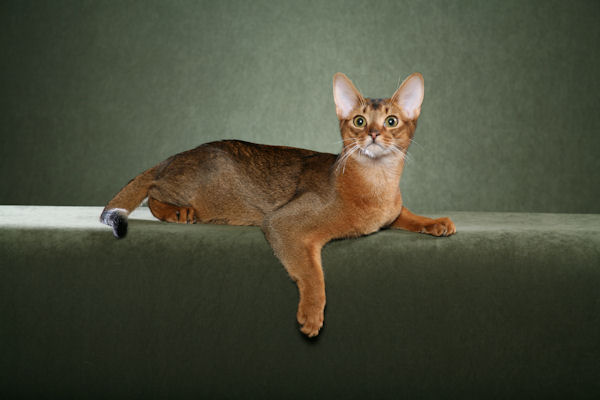

In [64]:

print(type(x))
x

In [65]:
y #Abyssian을 숫자로 반환한 것이 바로 0이다.

0

In [67]:
transform = transforms.Compose([
    transforms.Resize((224,224),antialias=True), #이미지 resize - h:224, w:224
    transforms.ToTensor()
    
])
#사이즈를 바꿔 보는 것이다!

train_set = OxfordPetDataset(train_path_list,transform=transform)
test_set = OxfordPetDataset(test_path_list,transform=transform)


#loader를 이용해 로드한다.
train_loader = DataLoader(train_set,batch_size=100,shuffle=True,drop_last=True)
test_loader = DataLoader(test_set,batch_size=100)




In [68]:
x,y = next(iter(train_loader))


x.shape #100은 batch, 3 : channel , 224x224

torch.Size([100, 3, 224, 224])

# Dataset을 이용해 CSV파일에 저장된 데이터셋 로딩

In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader,TensorDataset



In [2]:
iris = pd.read_csv('data/iris.data',header=None,names=["꽃받침길이","꽃받침너비","꽃잎길이","꽃잎너비","정답"])

iris.shape

(150, 5)

In [3]:
iris.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,정답
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['정답'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
index_to_class = list(iris['정답'].unique())
#index_to_class
class_to_index ={class_name:idx for idx,class_name in enumerate(index_to_class)} #이 구문을 잘 보도록 하기.
class_to_index


{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [6]:
X = iris.drop(columns="정답").values
y = iris['정답']
y = y.apply(lambda x:class_to_index[x]).to_frame().values #y를 index로 반환. #이 코드를 잘 보도록 하자. 복습!!
y
#x와 y를 직접 보고싶으면 그걸 출력해보자.

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [7]:
#train과 test set을 분리.

!pip install scikit-learn

In [8]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y, #나눌 대상, input,output dataset
                                                 test_size=0.2, #test 데이터셋의 비율
                                                 stratify=y #분류: 클래스별 데이터 비율에 맞춰서 나눈다. 그니까 원본의 클래스의 데이터 비율에 맞춘다는 이야기.
                                                 #stratify를 안하면, 비율이 약간은 어그러진다.
                                                )

In [9]:
X.shape, X_train.shape, X_test.shape

((150, 4), (120, 4), (30, 4))

In [10]:
y.shape, y_train.shape, y_test.shape

((150, 1), (120, 1), (30, 1))

In [11]:
np.unique(y,return_counts=True)[1]/150 #서로 동일한 비율로 나뉘어져 있다는 것을 볼 수 있다. return_counts=True 를 잘 보길 바란다.

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
## dataset 생성
## 원본 데이터가 메모리에 tensor 객체로 있을때 ->  tensordataset을 이용해서 생성한다.

## tensordataset(input: torch.tensor,output:torch.tensor)


#그냥 이런 식으로 대입만 하면, 데이터가 비교적 쉽게 만들어진다.
#오류가 있으니 강의 코드 등을 확인하자.
iris_trainset = TensorDataset(torch.tensor(X_train,dtype=torch.float32), #x/input
                            torch.tensor(y_train,dtype=torch.float32)  #y/output
                             ) 
iris_testset = TensorDataset(torch.tensor(X_test,dtype=torch.float32),
                            torch.tensor(y_test,dtype=torch.float32))

In [13]:
x,y = iris_trainset[0]
print(x)
print(y)

tensor([5.0000, 3.4000, 1.5000, 0.2000])
tensor([0.])


## torchvision.datasets.ImageFolder 이용
- 저장장치에 파일로 저장된 image들을 쉽게 로딩할 수 있도록 한다.
- train/validation/test 데이터셋을 저장하는 디렉토리에 class 별로 디렉토리를 만들고 이미지를 저장한다.

In [14]:
#google drive의 공유파일을 다운로드 하는 라이브러리이다.
!pip install gdown --upgrade

In [15]:
import os
from zipfile import ZipFile
import gdown
def down_extract():
    os.makedirs('data', exist_ok=True)
    url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
    fname = 'data/cats_and_dogs_small.zip'

    gdown.download(url, fname, quiet=False)
    
    #zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
    from zipfile import ZipFile
    # 압축풀기: ZipFile(압축파일경로).extractall(풀경로) # 디렉토리 없으면 생성해 준다.
    with ZipFile(fname) as zipFile: #zipFile이 ZipFile(fname)의 값을 가지게 된다.
        zipFile.extractall(os.path.join('data','cats_and_dogs_small'))
        
down_extract()        

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=28d062ec-20e2-460b-84c2-7afc75f02896
To: C:\Users\User\부트캠프 강의-파이썬\Deeplearning_pytorch\data\cats_and_dogs_small.zip
100%|█████████████████████████████████████████████████████████████████████████████| 90.8M/90.8M [00:04<00:00, 22.4MB/s]


In [187]:
#주피터 노트북에서 다운로드가 잘 되었음을 잘 파악하자.

In [17]:
from torchvision.datasets import ImageFolder
#새로운 것을 import하자.
#imagefolder를 이용해서 dataset을 생성한다.
#파일 경로는 위의 경로를 잘 파악해서 생성하도록 한다.
cd_train_set = ImageFolder(root="data/cats_and_dogs_small/train", #클래스별 폴더가 있는 디렉토리 설정
                          )


cd_test_set = ImageFolder(root="data/cats_and_dogs_small/test")#transform=transform.totensor()) #totensor를 통해 tensor로 바꿀 수 있다.
cd_vaild_set = ImageFolder(root="data/cats_and_dogs_small/validation")


In [18]:
isinstance(cd_train_set,Dataset)

True

In [19]:
cd_train_set

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: data/cats_and_dogs_small/train

In [211]:
cd_train_set.classes

['cats', 'dogs']

In [20]:
x,y = cd_train_set[1]
print(y,cd_train_set.classes[y])

0 cats


In [21]:
print(type(x))

<class 'PIL.Image.Image'>


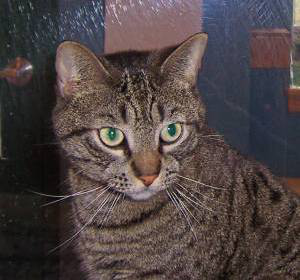

In [23]:
x



# 모델 성능 평가를 위한 데이터셋 분리
- **Train 데이터셋 (훈련/학습 데이터셋)**
    - 모델을 학습시킬 때 사용할 데이터셋.
- **Validation 데이터셋 (검증 데이터셋)**
    - 모델의 성능 중간 검증을 위한 데이터셋
- **Test 데이터셋 (평가 데이터셋)**
    - 모델의 성능을 최종적으로 측정하기 위한 데이터셋
    - **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**
 
## Validataion 과 Test datas 분리이유
- 모델을 훈련하고 평가했을때 원하는 성능이 나오지 않으면 모델을 수정한 뒤에 다시 훈련시키고 검증 하게 된다. 원하는 성능이 나올때 까지 **설정변경->훈련->검증**을 반복하게 된다. 
- 위 사이클을 반복하게 되면검증가결과를 바탕으로모델 설정을 변경하게 되므로 **검증할 때 사용한 데이터셋에 모을이 맞춰서 훈련하는 , 즉 검증데이테셋으로 모델을 학습한 것과 같다..*) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 모델의 성능을 제대로 평가할 수 없게 된다. 그래서 데이터셋을 train 세트, validation 세터, test 세트로 나눠 train set 와 validation set으로 모델을 최적화 한 뒤 마지막 학습하는 과정에서 **한번도 사용하지 않았던  test set으로 최종 평가를 한다**
종 평가를 한다.

> - **(Parameter)머신러닝 모델 파라미터**
>    - 성능에 영향을 주는 값으로 최적의야 하는 대상내는 값을 찾아야 한다.
>       - **하이퍼파라미터(Hyper Parameter)**
>            - 사람이 직접 설정해야하는 파라미터 값
>       - **파라미터(Parameter)**
>            - 데이터 학습을 통해 찾는 파라미터 값

In [220]:
#머신러닝 단계에서는 보통 3개로 데이터를 구분한다.

## 파이토치 데이터셋 분리

### torch.utils.data.Subset을 이용

- Dataset의 일부를 가지는 부분집합 데이터셋을 생성
- 주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)

In [25]:
#traindataset과 testdataset이 있는 경우
#혹은 VaildationDataSet을 분리하려고 하는 경우를 잘 구분하자.



import torch
from torch.utils.data import Subset


data = torch.tensor([[1,2],[3,4],[5,6],[7,8],[9,10]])
label = torch.tensor([[1],[2],[2],[0],[1]])
print(data.shape,label.shape)
dataset = TensorDataset(data,label)
len(dataset)

torch.Size([5, 2]) torch.Size([5, 1])


5

In [26]:
d1 = Subset(dataset,[0,1])#data의 index 0,1을 d1로
#dataset의 input/output 중 0,1 index의 값들로 부분 집합 dataset을 생성한다. 이게 바로 subset의 역활이다.

d2 = Subset(dataset,[2,3,4])#data의 index 2,3,4를 d2로 나누기.
#data의 index 2,3,4를 d2로 나눈다.



print(type(d1),isinstance(d1,Dataset)) #isinstance를 통해 참거짓을 가린다.
print(len(d1),len(d2))



<class 'torch.utils.data.dataset.Subset'> True
2 3


In [27]:
d1[1]

(tensor([3, 4]), tensor([2]))

In [30]:
from torchvision import datasets
DATA_ROOT_PATH ="datasets"  #이름을 미리 정해두는 것이다.
#dataset과 trainset을 만들자.
mnist_trainset = datasets.MNIST(root=DATA_ROOT_PATH,train=True,download=True,transform=transforms.ToTensor())


len(mnist_trainset)


60000

In [242]:
#mnist_trainset ->trainset,validation set
t_index = list(range(50000))
v_index = list(range(50000,60000))

#subset을 만든다. 위에서 정의한 mnist_trainset을 적용한다.
t_set = Subset(mnist_trainset,t_index)
v_set = Subset(mnist_trainset,v_index)
len(t_set),len(v_set)



(50000, 10000)

### random_split() 함수 이용

- Dataset객체와 나눌 데이터셋들의 원소개수를 리스트로 묶어서 전달하면  Shuffle후 나눈뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.